In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
df = pd.read_csv('results/dataframes/raw/circle.csv', index_col=None)
df.head()

,filename,radius,x,y,z,index
0,frame583.jpg,18.928656,759.457596,414.803886,106.032213,583
1,frame597.jpg,20.041954,759.899792,414.382050,104.945867,597
2,frame1188.jpg,18.338215,750.687222,406.036407,108.042501,1188
3,frame1605.jpg,17.925013,753.075359,402.098953,109.776490,1605
4,frame540.jpg,21.508453,759.403168,414.805885,109.100190,540


In [9]:
images = df['filename'].values
indexes = [int(filename.split('.')[0][5:]) for filename in images if filename.split('.')[1]=='jpg']
df['index'] = indexes
df.head()

,filename,radius,x,y,z,index
1206,frame0.jpg,18.981075,754.199081,398.608253,114.925085,0
1253,frame1.jpg,17.501575,753.863636,399.318184,109.339580,1
1143,frame2.jpg,19.150291,753.498363,398.986092,107.548615,2
1101,frame3.jpg,18.522097,754.792683,398.853661,109.311379,3
920,frame4.jpg,17.846668,754.500000,398.500000,109.535536,4


In [10]:
df = df.sort_values(by=['index'])
df.head()

,filename,radius,x,y,z,index
1206,frame0.jpg,18.981075,754.199081,398.608253,114.925085,0
1253,frame1.jpg,17.501575,753.863636,399.318184,109.339580,1
1143,frame2.jpg,19.150291,753.498363,398.986092,107.548615,2
1101,frame3.jpg,18.522097,754.792683,398.853661,109.311379,3
920,frame4.jpg,17.846668,754.500000,398.500000,109.535536,4


In [11]:
def increase_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color spcae
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    # Stacking the original image with the enhanced image
#    result = np.hstack((img, enhanced_img))
    return img, enhanced_img

In [12]:
scale=3
for i, filename in enumerate(df['filename'].values):
    img = cv2.imread('images/circle/{}'.format(filename))
    cropped = img[300:600, 600:1000, :]
    width = int(cropped.shape[1] * scale)
    height = int(cropped.shape[0] * scale)
    dim = (width, height)
    cropped, contrast = increase_contrast(cropped)
    _, contrast = increase_contrast(contrast)
    for j in range(1):
        contrast = cv2.medianBlur(contrast, 3)



    resized = cv2.resize(contrast, dim, interpolation = cv2.INTER_AREA)
    if i > 2:
        previous_x = df['x'].values[:i]
        previous_y = df['y'].values[:i]
        for k in range(previous_x.shape[0]-1):
            start = np.array([previous_x[k], previous_y[k]])
            trans_start = start-np.array([600, 300])
            final_start = trans_start*scale
            end = np.array([previous_x[k+1], previous_y[k+1]])
            trans_end = end-np.array([600, 300])
            final_end = trans_end*scale
            cv2.line(resized, final_start, final_end, (255, 255, 255), thickness=3, lineType=8)
    cm = plt.get_cmap('viridis')
    center = 0.5*(final_start+final_end)
    cv2.circle(resized, (int(center[0]), int(center[1])), scale*20, (255,255,255), thickness=1)
    resized = cm(cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY))
    plt.imshow(resized)
    plt.savefig('results/trajectory-circle/{}'.format(filename))
    #    print(resized)
#    cv2.imwrite('trajectory/{}'.format(filename), resized)
    
    '''
    start = (scale*(x-750-radius),scale*(y-370-radius))
    end = (scale*(x-750+radius), scale*(y-370+radius))
    color = (0, 0, 255)
    font = cv2.FONT_HERSHEY_DUPLEX
    fontScale=0.5

    thickness = 1
    for i in range(5):
        resized = cv2.medianBlur(resized, 5)
        resized = cv2.GaussianBlur(resized, (5,5), cv2.BORDER_DEFAULT)

    cv2.rectangle(resized, start, end, color, thickness)

    resized = cv2.putText(resized, f'C: ({int(start[0]+scale*radius)}, {int(start[1]+scale*radius)})', 
                           (start[0], start[1]-5), font, 
                       fontScale, color, thickness, cv2.LINE_AA)
    resized = cv2.putText(resized, f'R: {int(scale*radius)}', (start[0],start[1]-20), font, 
                       fontScale, color, thickness, cv2.LINE_AA)    


    cropped = img
    '''
    #break

NameError: name 'final_start' is not defined

In [60]:
import numpy as np
import glob

frameSize = (1200, 900)
 
out = cv2.VideoWriter('trajectory.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 15, frameSize)

for filename in df['filename'].values:
    img = cv2.imread('trajectory/{}'.format(filename))
    print(img.shape)
    out.write(img)

out.release()

(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200, 3)
(900, 1200

(720, 1280, 4)


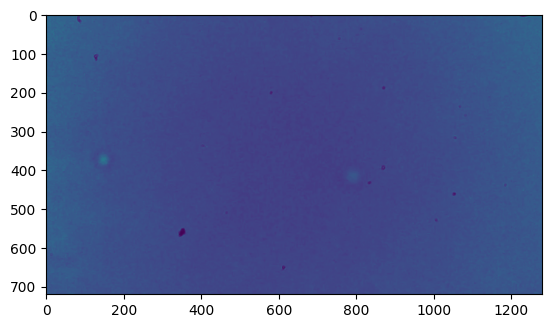

In [61]:
im = cv2.imread('analysis/frame444.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

cm = plt.get_cmap('viridis')

# Apply the colormap like a function to any array:
colored_image = cm(im)
print(colored_image.shape)
plt.imshow(colored_image)